In [ ]:
#---Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import pearsonr
from sklearn.feature_selection import f_classif, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **Data Integration**

In [ ]:
# Import unclean mergednew data (1970-2024)
df = pd.read_csv("mergednew.csv")
df

,state,date,type,sex,abs,rate,piped_water,sanitation,electricity,income_mean,gini,poverty_absolute,cpi
0,Johor,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.0,NaN,45.7,NaN
1,Johor,1974-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382.0,0.439,NaN,NaN
2,Johor,1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.0,0.469,29.0,NaN
3,Johor,1979-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731.0,0.442,18.2,NaN
4,Johor,1984-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1065.0,0.404,12.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,W.P. Putrajaya,2022-01-01,neonatal,female,6.0,6.8,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3076,W.P. Putrajaya,2022-01-01,neonatal,male,2.0,2.1,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3077,W.P. Putrajaya,2022-01-01,neonatal,both,8.0,4.4,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3078,W.P. Putrajaya,2022-01-01,infant,female,9.0,10.2,100.0,100.0,100.0,13473.0,0.368,0.1,NaN


In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract rows from year 2017 to 2022
dt = df[(df['date'].dt.year >= 2017) & (df['date'].dt.year <= 2022)]

# Display the result (unclean mergednew data 2017-2022)
dt

,state,date,type,sex,abs,rate,piped_water,sanitation,electricity,income_mean,gini,poverty_absolute,cpi
35,Johor,2017-01-01,neonatal,female,123.0,4.178415,NaN,NaN,NaN,NaN,NaN,NaN,97.725
36,Johor,2017-01-01,neonatal,both,274.0,4.485553,NaN,NaN,NaN,NaN,NaN,NaN,97.725
37,Johor,2017-01-01,infant,female,187.0,6.352550,NaN,NaN,NaN,NaN,NaN,NaN,97.725
38,Johor,2017-01-01,infant,male,226.0,7.141052,NaN,NaN,NaN,NaN,NaN,NaN,97.725
39,Johor,2017-01-01,infant,both,413.0,6.761071,NaN,NaN,NaN,NaN,NaN,NaN,97.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,W.P. Putrajaya,2022-01-01,neonatal,female,6.0,6.800000,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3076,W.P. Putrajaya,2022-01-01,neonatal,male,2.0,2.100000,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3077,W.P. Putrajaya,2022-01-01,neonatal,both,8.0,4.400000,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3078,W.P. Putrajaya,2022-01-01,infant,female,9.0,10.200000,100.0,100.0,100.0,13473.0,0.368,0.1,NaN


## **Data Cleaning**

### **Check Duplicates**

In [ ]:
# --- Check duplicate values in data
dt.duplicated().sum()

np.int64(474)

In [ ]:
dt=dt.drop_duplicates()

In [ ]:
# --- Check duplicate values in data
dt.duplicated().sum()

np.int64(0)

In [ ]:
dt

,state,date,type,sex,abs,rate,piped_water,sanitation,electricity,income_mean,gini,poverty_absolute,cpi
35,Johor,2017-01-01,neonatal,female,123.0,4.178415,NaN,NaN,NaN,NaN,NaN,NaN,97.725
36,Johor,2017-01-01,neonatal,both,274.0,4.485553,NaN,NaN,NaN,NaN,NaN,NaN,97.725
37,Johor,2017-01-01,infant,female,187.0,6.352550,NaN,NaN,NaN,NaN,NaN,NaN,97.725
38,Johor,2017-01-01,infant,male,226.0,7.141052,NaN,NaN,NaN,NaN,NaN,NaN,97.725
39,Johor,2017-01-01,infant,both,413.0,6.761071,NaN,NaN,NaN,NaN,NaN,NaN,97.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,W.P. Putrajaya,2022-01-01,neonatal,female,6.0,6.800000,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3076,W.P. Putrajaya,2022-01-01,neonatal,male,2.0,2.100000,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3077,W.P. Putrajaya,2022-01-01,neonatal,both,8.0,4.400000,100.0,100.0,100.0,13473.0,0.368,0.1,NaN
3078,W.P. Putrajaya,2022-01-01,infant,female,9.0,10.200000,100.0,100.0,100.0,13473.0,0.368,0.1,NaN


### **Check Missing Values**

In [ ]:
# --- Check how many missing values each column has
dt.isnull().sum()

,0
state,0
date,0
type,0
sex,0
abs,0
rate,0
piped_water,384
sanitation,384
electricity,384
income_mean,288


In [ ]:
#--- Linear Interpolation
time_series_cols = ['income_mean', 'poverty_absolute', 'gini','piped_water', 'sanitation', 'electricity', 'cpi']

#--- Ensure data is sorted for chronological filling
dt = dt.sort_values(by=['state', 'date']).reset_index(drop=True)

#--- Forward fill by state
dt[time_series_cols] = dt.groupby('state')[time_series_cols].ffill()

#--- Apply Linear Interpolation
dt[time_series_cols] = dt.groupby('state')[time_series_cols].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both'))

#--- Apply Median Imputation for any missed NULLs
for col in time_series_cols:
    median_val = dt[col].median()
    dt[col] = dt[col].fillna(median_val)
dt

,state,date,type,sex,abs,rate,piped_water,sanitation,electricity,income_mean,gini,poverty_absolute,cpi
0,Johor,2017-01-01,neonatal,female,123.0,4.178415,98.8,98.98,100.0,8013.0,0.366,3.9,97.725000
1,Johor,2017-01-01,neonatal,both,274.0,4.485553,98.8,98.98,100.0,8013.0,0.366,3.9,97.725000
2,Johor,2017-01-01,infant,female,187.0,6.352550,98.8,98.98,100.0,8013.0,0.366,3.9,97.725000
3,Johor,2017-01-01,infant,male,226.0,7.141052,98.8,98.98,100.0,8013.0,0.366,3.9,97.725000
4,Johor,2017-01-01,infant,both,413.0,6.761071,98.8,98.98,100.0,8013.0,0.366,3.9,97.725000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,W.P. Putrajaya,2022-01-01,neonatal,female,6.0,6.800000,100.0,100.00,100.0,13473.0,0.368,0.1,115.358333
1946,W.P. Putrajaya,2022-01-01,neonatal,male,2.0,2.100000,100.0,100.00,100.0,13473.0,0.368,0.1,115.358333
1947,W.P. Putrajaya,2022-01-01,neonatal,both,8.0,4.400000,100.0,100.00,100.0,13473.0,0.368,0.1,115.358333
1948,W.P. Putrajaya,2022-01-01,infant,female,9.0,10.200000,100.0,100.00,100.0,13473.0,0.368,0.1,115.358333


In [ ]:
# --- Check how many missing values each column has after imputation and linear interpolation
dt.isnull().sum()

,0
state,0
date,0
type,0
sex,0
abs,0
rate,0
piped_water,0
sanitation,0
electricity,0
income_mean,0


## **Data Understanding**

In [ ]:
#--- Summary Statistic for Numerical Features
numerical_cols = ['abs', 'rate', 'piped_water', 'sanitation','electricity','income_mean', 'poverty_absolute','gini', 'cpi']
dt[numerical_cols].describe()

,abs,rate,piped_water,sanitation,electricity,income_mean,poverty_absolute,gini,cpi
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
mean,125.549744,5.502850,86.344308,99.090554,98.901846,6515.701538,9.770154,0.371668,118.393872
std,83.993637,1.645362,18.311236,3.543314,4.491641,1678.925674,5.779430,0.023789,14.793586
min,1.000000,1.303781,3.700000,74.640000,40.200000,4411.000000,0.100000,0.300000,93.125000
25%,70.000000,4.195405,76.800000,99.900000,99.800000,5667.000000,5.900000,0.359000,110.075000
50%,105.000000,5.500000,96.100000,100.000000,100.000000,5959.000000,9.000000,0.382000,115.358333
75%,170.000000,6.500000,99.600000,100.000000,100.000000,6707.000000,12.400000,0.387000,121.250000
max,662.000000,12.210012,100.000000,100.000000,100.000000,13473.000000,25.300000,0.397000,170.116667


In [ ]:
#--- Summary Statistic for Categorical Features
categorical_cols=['state','type','sex']
dt[categorical_cols].describe()

,state,type,sex
count,1950,1950,1950
unique,16,2,3
top,Sarawak,neonatal,female
freq,510,975,650


## **Feature Engineering**

In [ ]:
#--- Label Enconding Categorical Features
le = LabelEncoder()

dt['state'] = le.fit_transform(dt['state'])
dt['type']  = le.fit_transform(dt['type'])
dt['sex']  = le.fit_transform(dt['sex'])

## **EDA**

In [ ]:
#--- Check the data types after label encode categorical features
dt.dtypes

,0
state,int64
date,datetime64[ns]
type,int64
sex,int64
abs,float64
rate,float64
piped_water,float64
sanitation,float64
electricity,float64
income_mean,float64


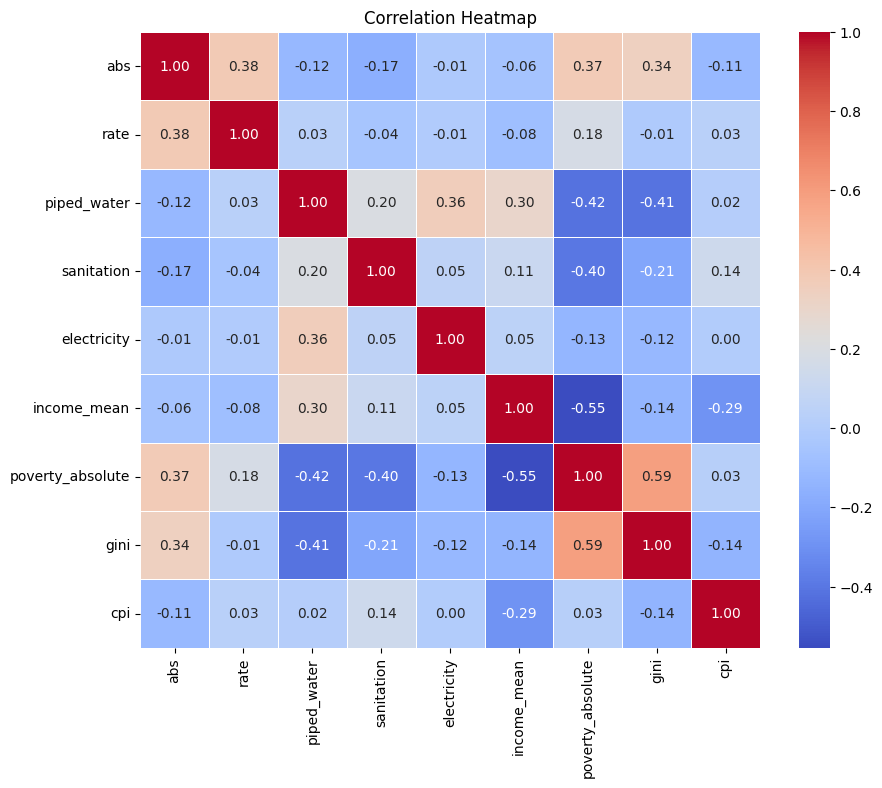

In [ ]:
#--- Check for correlation
corr = dt[numerical_cols].corr()

# --- Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

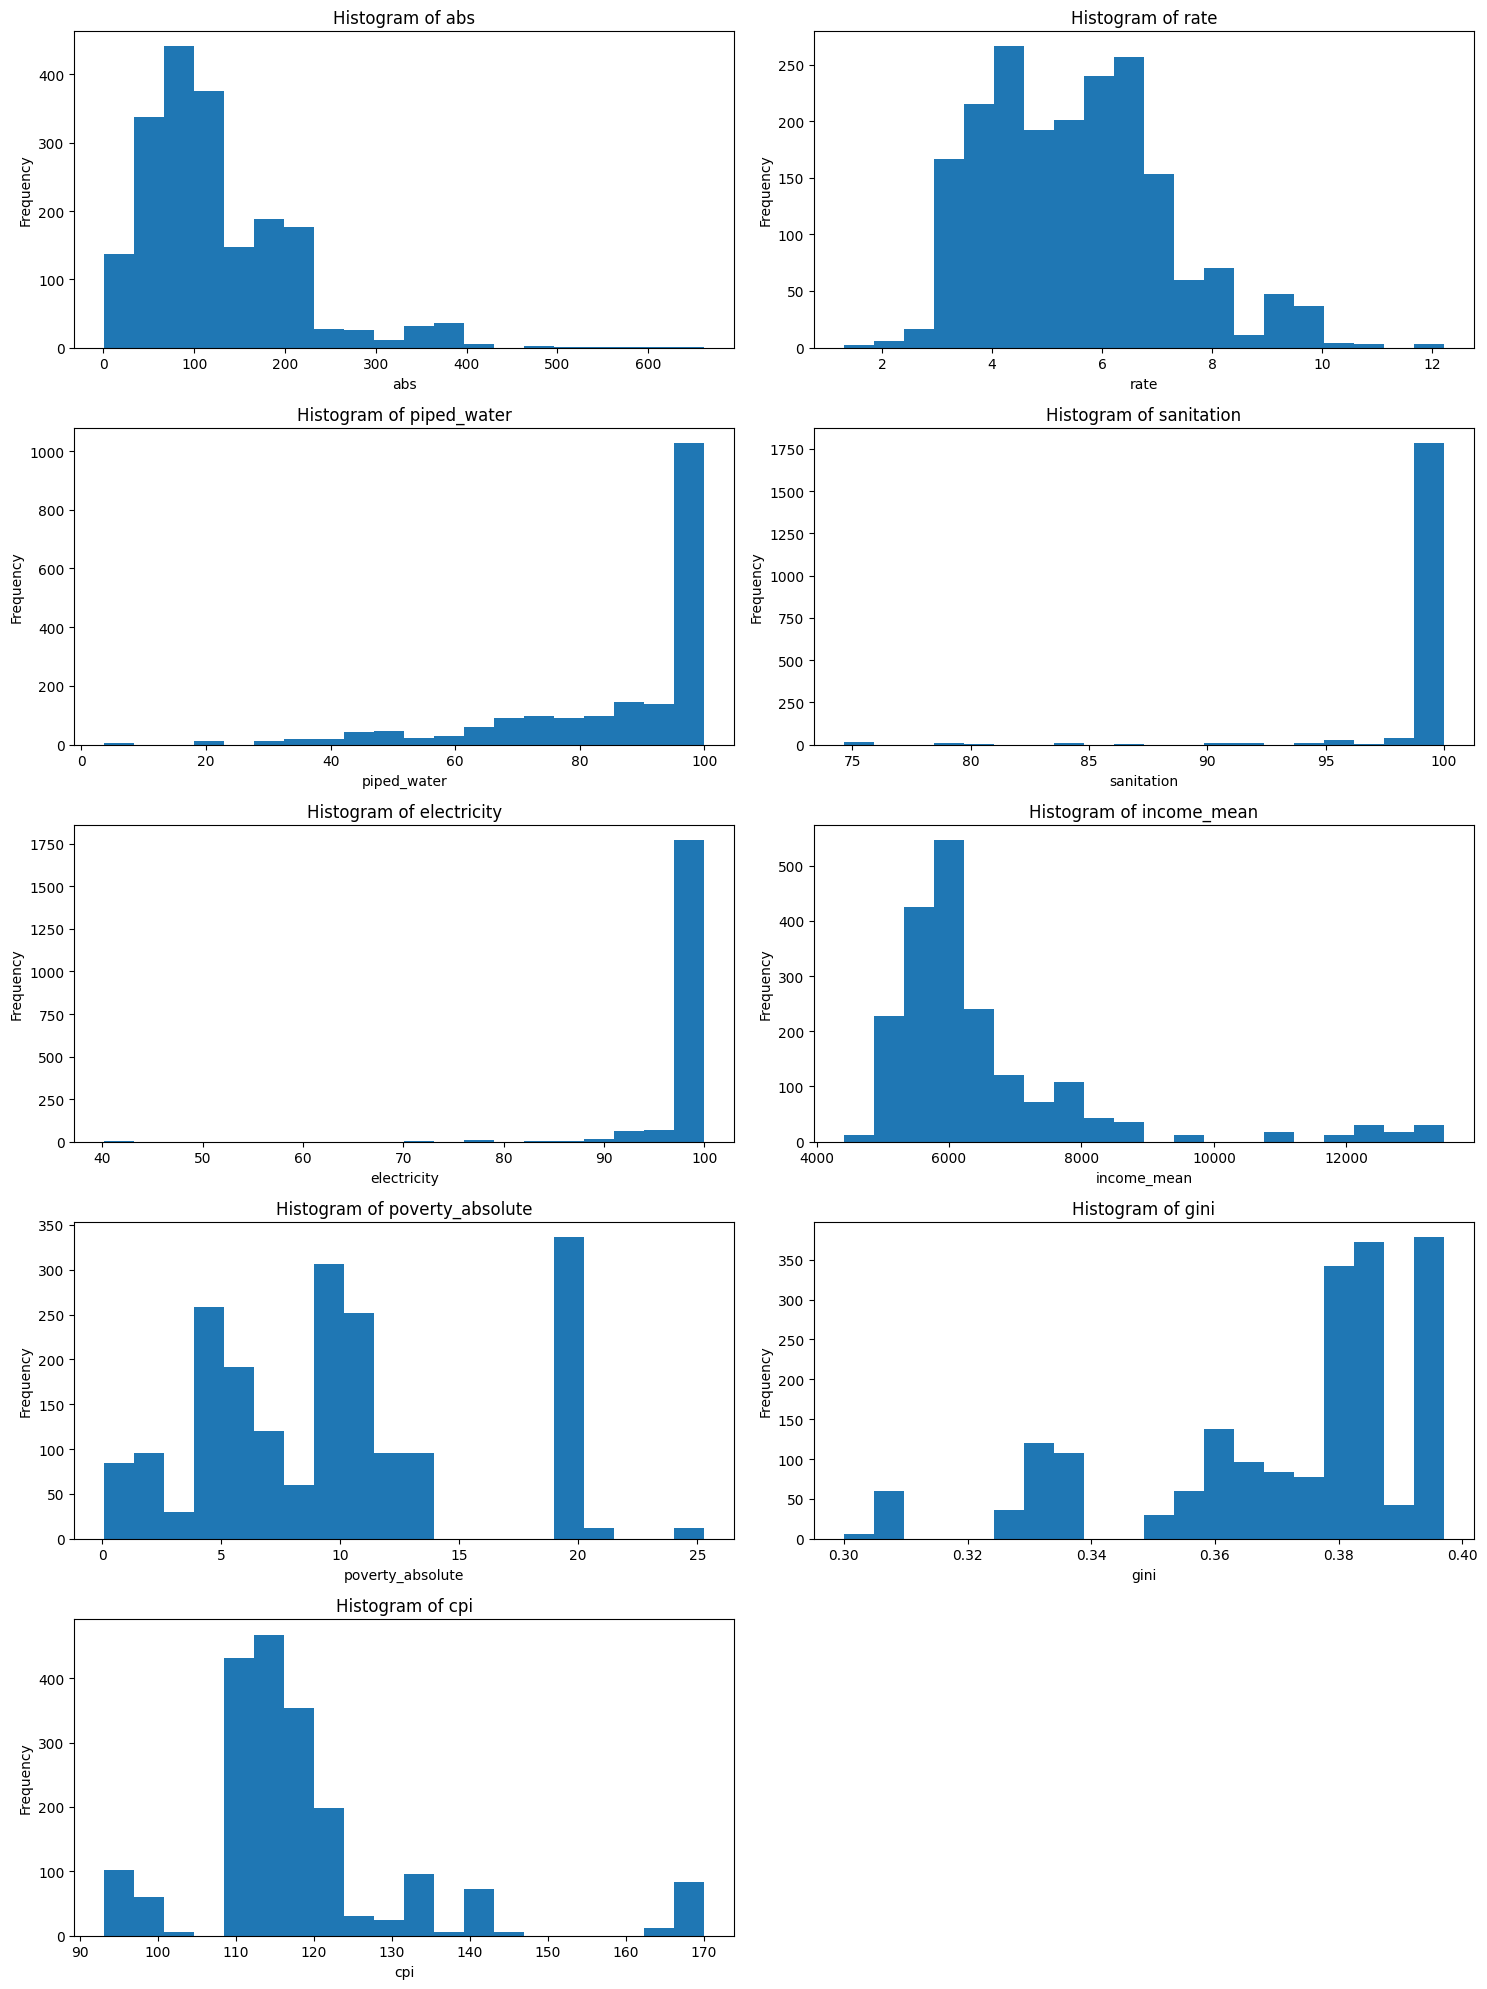

In [ ]:
#--- Check Distribution for numerical features
# Plot histograms
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    plt.hist(dt[col], bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

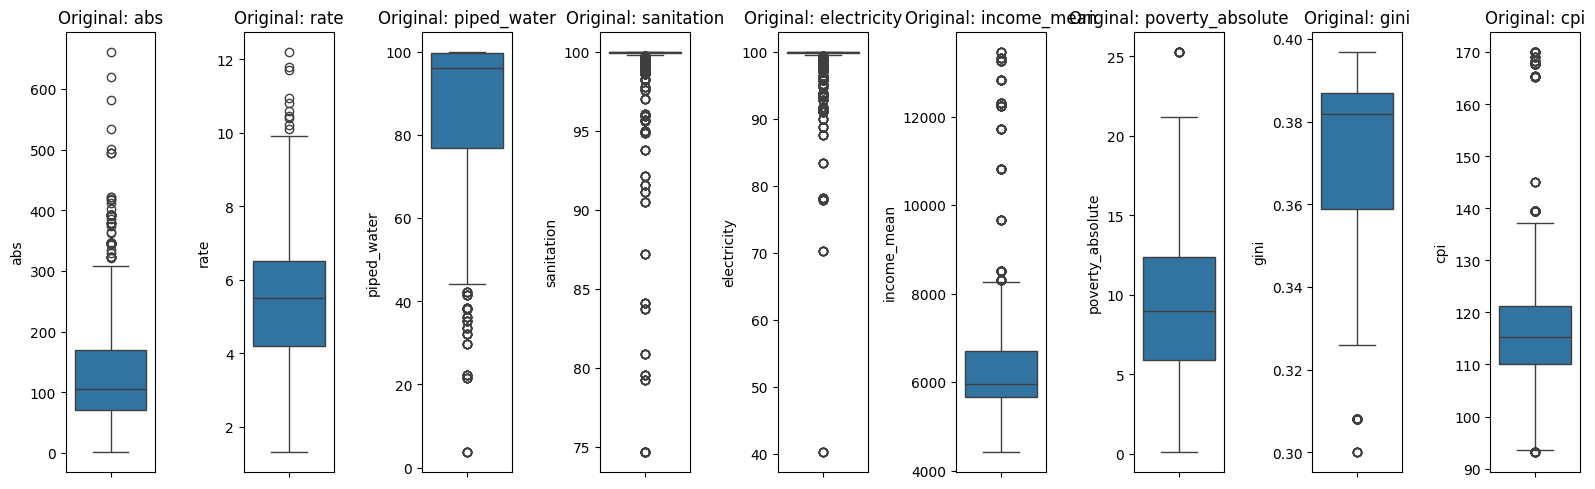

In [ ]:
#--- Check for outliers
plt.figure(figsize=(16, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=dt[col])
    plt.title(f'Original: {col}')
plt.tight_layout()
plt.show()

In [ ]:
#--- Multicollinearity Check using VIF calculation
X = dt[numerical_cols].dropna()
vif_dt = pd.DataFrame()
vif_dt['feature'] = X.columns
vif_dt['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_dt

,feature,VIF
0,abs,4.601219
1,rate,14.928941
2,piped_water,35.091462
3,sanitation,550.722240
4,electricity,419.820060
5,income_mean,28.338500
6,poverty_absolute,11.401160
7,gini,407.142730
8,cpi,73.090052


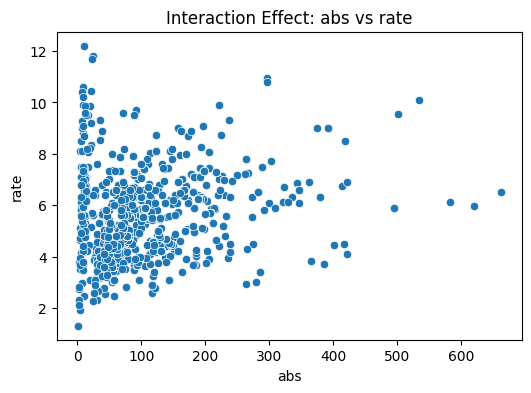

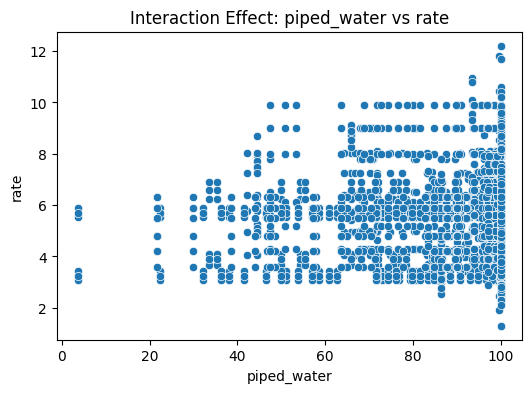

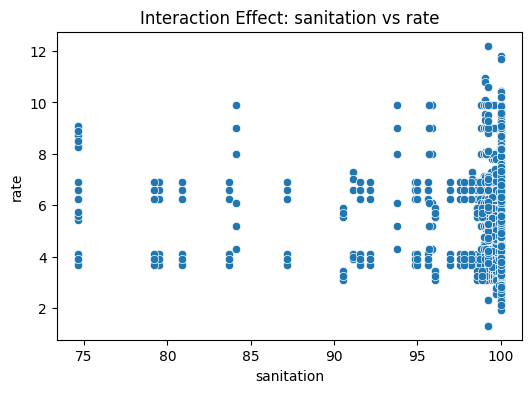

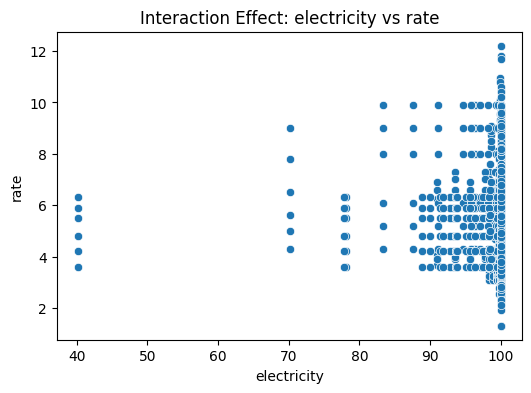

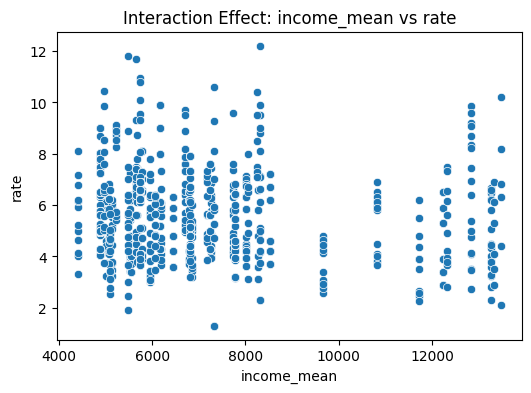

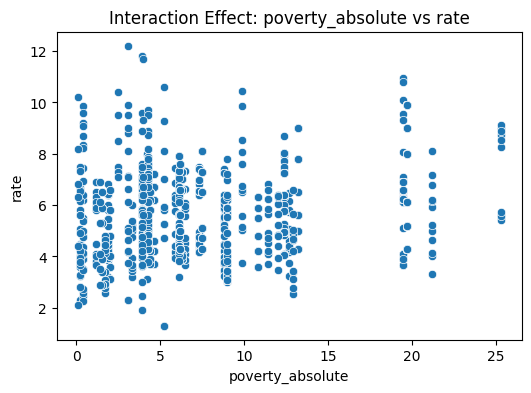

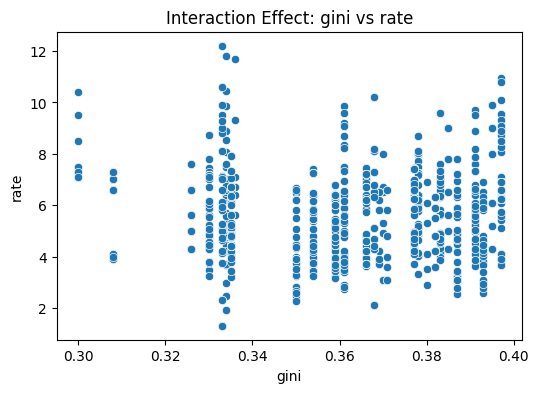

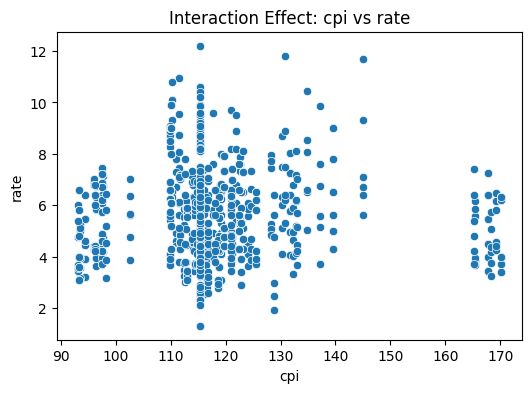

In [ ]:
#--- Interaction Effects (numeric variables)
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each numeric feature (excluding the target itself)
for col in numerical_cols:
    if col != 'rate':
        # Create interaction term between feature and rate
        dt[f'{col}_x_rate'] = dt[col] * dt['rate']

        # Scatter plot of feature vs rate
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=dt[col], y=dt['rate'])
        plt.title(f'Interaction Effect: {col} vs rate')
        plt.xlabel(col)
        plt.ylabel('rate')
        plt.show()


## **Feature Selection**

In [ ]:
#---Feature selection - using Pearson Correlation
pearson_scores = []
for col in numerical_cols:
    corr, p_value = pearsonr(dt[col], dt['rate'])
    pearson_scores.append({'Feature': col, 'Pearson_corr': corr, 'p_value': p_value})

pearson_dt = pd.DataFrame(pearson_scores).sort_values(by='Pearson_corr', key=abs, ascending=False)
pearson_dt

,Feature,Pearson_corr,p_value
1,rate,1.000000,0.000000e+00
0,abs,0.383167,3.217809e-69
6,poverty_absolute,0.178246,2.197150e-15
5,income_mean,-0.083666,2.166922e-04
3,sanitation,-0.044969,4.708697e-02
2,piped_water,0.028891,2.022312e-01
8,cpi,0.028701,2.052112e-01
7,gini,-0.012873,5.699497e-01
4,electricity,-0.006688,7.678912e-01


In [ ]:
#--- Feature selection - using Anova
anova_scores = []
for col in categorical_cols:
    F, p = f_classif(dt[[col]], dt['rate'])
    anova_scores.append({'Feature': col, 'F_score': F[0], 'p_value': p[0]})

anova_dt = pd.DataFrame(anova_scores).sort_values(by='F_score', ascending=False)
anova_dt

,Feature,F_score,p_value
1,type,70.627860,0.000000e+00
2,sex,15.276136,0.000000e+00
0,state,10.574109,3.082252e-265


## **Data Partitioning**

In [ ]:
#--- Assign input and output variable
X = dt[['abs','state','type','sex', 'income_mean', 'poverty_absolute','gini','piped_water','sanitation','electricity', 'cpi']]
y = dt['rate']

In [ ]:
#--- Split dataset to train and test using Holdout method
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)

## **Feature Scaling**

In [ ]:
#--- Feature scaling
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)

## **Model Development**

### **Polynomial Regression Model**


In [ ]:
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Instantiate PolynomialFeatures with degree=2 and include_bias=False
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. Transform both X_train and X_test
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. Initialize a LinearRegression model
lr_poly = LinearRegression()

# Record training start time
t_start_poly = time.time()

# 4. Train the LinearRegression model using the polynomial features of X_train
lr_poly.fit(X_train_poly, y_train)

# Record training end time
t_end_poly = time.time()
training_time_poly = t_end_poly - t_start_poly

# 5. Make predictions on the polynomial features of X_test
y_pred_poly = lr_poly.predict(X_test_poly)

# 6. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

# Calculate Adjusted R-squared
n_poly = len(y_test)          # Number of samples
p_poly = X_test_poly.shape[1] # Number of features
adj_r2_poly = 1 - (1 - r2_poly) * (n_poly - 1) / (n_poly - p_poly - 1)

# Print evaluation results
print(f"Polynomial Regression Model Performance:")
print(f"R-squared: {r2_poly:.4f}")
print(f"Adjusted R-squared: {adj_r2_poly:.4f}")
print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.4f}")
print(f"Mean Absolute Error (MAE): {mae_poly:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_poly:.4f}")
print(f"Training Time: {training_time_poly:.4f} seconds")

Polynomial Regression Model Performance:
R-squared: 0.8359
Adjusted R-squared: 0.7954
Mean Squared Error (MSE): 0.4035
Root Mean Squared Error (RMSE): 0.6353
Mean Absolute Error (MAE): 0.4218
Mean Absolute Percentage Error (MAPE): 0.0836
Training Time: 0.0085 seconds


### **Decision Tree Regression Model**

In [ ]:
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Initialize a DecisionTreeRegressor model object with default parameters
dtr_model = DecisionTreeRegressor()

# Record training start time
t_start_dtr = time.time()

# 2. Train the model using the training data (X_train and y_train)
dtr_model.fit(X_train, y_train)

# Record training end time
t_end_dtr = time.time()
training_time_dtr = t_end_dtr - t_start_dtr

# 3. Make predictions on the test data (X_test)
y_pred_dtr = dtr_model.predict(X_test)

# 4. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_dtr = r2_score(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mape_dtr = mean_absolute_percentage_error(y_test, y_pred_dtr)

# Calculate Adjusted R-squared
n_dtr = len(y_test)     # Number of samples
p_dtr = X_test.shape[1] # Number of features
adj_r2_dtr = 1 - (1 - r2_dtr) * (n_dtr - 1) / (n_dtr - p_dtr - 1)

# Print evaluation results
print("Decision Tree Regression Model Performance:")
print(f"R-squared: {r2_dtr:.4f}")
print(f"Adjusted R-squared: {adj_r2_dtr:.4f}")
print(f"Mean Squared Error (MSE): {mse_dtr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dtr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dtr:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_dtr:.4f}")
print(f"Training Time: {training_time_dtr:.4f} seconds")

Decision Tree Regression Model Performance:
R-squared: 0.7698
Adjusted R-squared: 0.7631
Mean Squared Error (MSE): 0.5660
Root Mean Squared Error (RMSE): 0.7523
Mean Absolute Error (MAE): 0.2552
Mean Absolute Percentage Error (MAPE): 0.0478
Training Time: 0.0153 seconds


### **Random Forest Regression Model**

In [ ]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Initialize a RandomForestRegressor model object with default parameters
rf_model = RandomForestRegressor(random_state=42) # Added random_state for reproducibility

# Record training start time
t_start_rf = time.time()

# 2. Train the model using the training data (X_train and y_train)
rf_model.fit(X_train, y_train)

# Record training end time
t_end_rf = time.time()
training_time_rf = t_end_rf - t_start_rf

# 3. Make predictions on the test data (X_test)
y_pred_rf = rf_model.predict(X_test)

# 4. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Calculate Adjusted R-squared
n_rf = len(y_test)     # Number of samples
p_rf = X_test.shape[1] # Number of features
adj_r2_rf = 1 - (1 - r2_rf) * (n_rf - 1) / (n_rf - p_rf - 1)

# Print evaluation results
print("Random Forest Regression Model Performance:")
print(f"R-squared: {r2_rf:.4f}")
print(f"Adjusted R-squared: {adj_r2_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.4f}")
print(f"Training Time: {training_time_rf:.4f} seconds")

Random Forest Regression Model Performance:
R-squared: 0.9181
Adjusted R-squared: 0.9157
Mean Squared Error (MSE): 0.2014
Root Mean Squared Error (RMSE): 0.4488
Mean Absolute Error (MAE): 0.1798
Mean Absolute Percentage Error (MAPE): 0.0353
Training Time: 0.6686 seconds


### **XGBoost Regression Model**

In [ ]:
import time
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Initialize an XGBRegressor model object with default parameters
xgb_model = XGBRegressor(random_state=42) # Added random_state for reproducibility

# Record training start time
t_start_xgb = time.time()

# 2. Train the model using the training data (X_train and y_train)
xgb_model.fit(X_train, y_train)

# Record training end time
t_end_xgb = time.time()
training_time_xgb = t_end_xgb - t_start_xgb

# 3. Make predictions on the test data (X_test)
y_pred_xgb = xgb_model.predict(X_test)

# 4. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Calculate Adjusted R-squared
n_xgb = len(y_test)     # Number of samples
p_xgb = X_test.shape[1] # Number of features
adj_r2_xgb = 1 - (1 - r2_xgb) * (n_xgb - 1) / (n_xgb - p_xgb - 1)

# Print evaluation results
print("XGBoost Regression Model Performance:")
print(f"R-squared: {r2_xgb:.4f}")
print(f"Adjusted R-squared: {adj_r2_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.4f}")
print(f"Training Time: {training_time_xgb:.4f} seconds")

XGBoost Regression Model Performance:
R-squared: 0.9063
Adjusted R-squared: 0.9035
Mean Squared Error (MSE): 0.2305
Root Mean Squared Error (RMSE): 0.4801
Mean Absolute Error (MAE): 0.1804
Mean Absolute Percentage Error (MAPE): 0.0349
Training Time: 0.1599 seconds


### **ANN Regression Model**

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Define the Regression ANN model
ann_model = Sequential([
    # Input layer and first hidden layer
    Dense(32, activation='relu', input_shape=(X_train_scale.shape[1],)),

    # Second hidden layer
    Dense(16, activation='relu'),

    # Output layer: 1 neuron for regression (predicting the mortality 'rate')
    Dense(1)
])

# 2. Compile the model for regression
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',           # Regression loss
    metrics=['mae']                      # Regression metric
)

# Record training start time
t_start_ann = time.time()

# 3. Train the model
history = ann_model.fit(
    X_train_scale, y_train,
    epochs=100,             # Regression often needs more epochs than classification
    batch_size=32,          # Smaller batch size often helps with smaller datasets
    validation_split=0.2,
    verbose=1
)

# Record training end time
t_end_ann = time.time()
training_time_ann = t_end_ann - t_start_ann

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 28.7565 - mae: 5.0594 - val_loss: 19.8916 - val_mae: 4.0839
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 15.5491 - mae: 3.5139 - val_loss: 9.3016 - val_mae: 2.5846
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.5178 - mae: 2.1179 - val_loss: 4.5974 - val_mae: 1.6797
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8462 - mae: 1.5655 - val_loss: 2.6681 - val_mae: 1.2471
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3255 - mae: 1.1754 - val_loss: 1.7758 - val_mae: 1.0033
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7215 - mae: 1.0052 - val_loss: 1.3431 - val_mae: 0.8720
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5556 - mae: 0.9368 - val_loss: 1.1182 - val_mae: 0.7929
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1679 - mae: 0.8198 - val_loss: 1.0189 - val_mae: 0.7575
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - lo

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 4. Make predictions on the test data
# Note: Use X_test_scale for ANN consistency
y_pred_ann = ann_model.predict(X_test_scale).flatten()

# 5. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_ann = r2_score(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mape_ann = mean_absolute_percentage_error(y_test, y_pred_ann)

# Calculate Adjusted R-squared
n_ann = len(y_test)               # Number of samples
p_ann = X_test_scale.shape[1]     # Number of features
adj_r2_ann = 1 - (1 - r2_ann) * (n_ann - 1) / (n_ann - p_ann - 1)

# Print evaluation results
print("\nANN Regression Model Performance:")
print(f"R-squared: {r2_ann:.4f}")
print(f"Adjusted R-squared: {adj_r2_ann:.4f}")
print(f"Mean Squared Error (MSE): {mse_ann:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ann:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ann:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ann:.4f}")
print(f"Training Time: {training_time_ann:.4f} seconds")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

ANN Regression Model Performance:
R-squared: 0.8163
Adjusted R-squared: 0.8109
Mean Squared Error (MSE): 0.4519
Root Mean Squared Error (RMSE): 0.6722
Mean Absolute Error (MAE): 0.4343
Mean Absolute Percentage Error (MAPE): 0.0846
Training Time: 46.3459 seconds


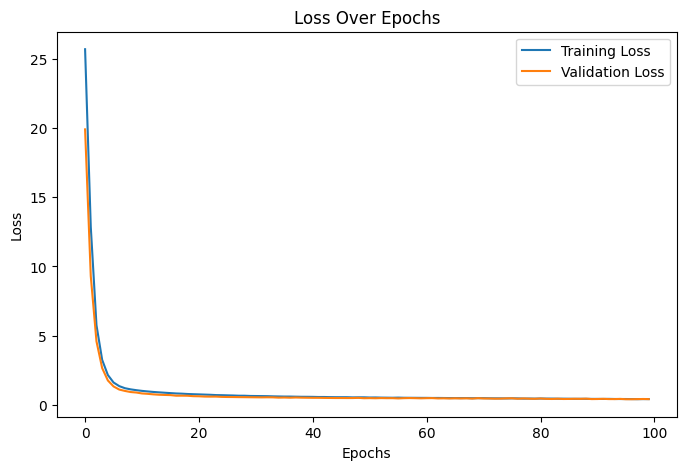

In [ ]:
# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Stacking Regression Model**

In [ ]:
import time
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Define base estimators
estimation_stk = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# 2. Instantiate a meta-estimator
meta_estimator = LinearRegression()

# 3. Initialize StackingRegressor
stacking_model = StackingRegressor(
    estimators=estimation_stk,
    final_estimator=meta_estimator,
    cv=5,
    n_jobs=-1
)

# Record training start time
t_start_stacking = time.time()

# 4. Train the StackingRegressor using the training data
stacking_model.fit(X_train, y_train)

# Record training end time
t_end_stacking = time.time()
training_time_stacking = t_end_stacking - t_start_stacking

# 5. Make predictions on the test data
y_pred_stacking = stacking_model.predict(X_test)

# 6. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_stacking = r2_score(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mape_stacking = mean_absolute_percentage_error(y_test, y_pred_stacking)

# Calculate Adjusted R-squared
n_stacking = len(y_test)     # Number of samples
p_stacking = X_test.shape[1] # Number of features
adj_r2_stacking = 1 - (1 - r2_stacking) * (n_stacking - 1) / (n_stacking - p_stacking - 1)

# Print evaluation results
print("Stacking Regression Model Performance:")
print(f"R-squared: {r2_stacking:.4f}")
print(f"Adjusted R-squared: {adj_r2_stacking:.4f}")
print(f"Mean Squared Error (MSE): {mse_stacking:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_stacking:.4f}")
print(f"Mean Absolute Error (MAE): {mae_stacking:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_stacking:.4f}")
print(f"Training Time: {training_time_stacking:.4f} seconds")

Stacking Regression Model Performance:
R-squared: 0.9222
Adjusted R-squared: 0.9200
Mean Squared Error (MSE): 0.1912
Root Mean Squared Error (RMSE): 0.4373
Mean Absolute Error (MAE): 0.1804
Mean Absolute Percentage Error (MAPE): 0.0352
Training Time: 6.2972 seconds


### **Grid Search for Random Forest**


In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Define a parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Initialize a RandomForestRegressor model object
rf_initial_model = RandomForestRegressor(random_state=42)

# 3. Instantiate GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_initial_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error', # Using negative MSE as GridSearchCV maximizes score
    n_jobs=-1,
    verbose=2
)

# Record training start time
t_start_rf_tuned = time.time()

# 4. Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Record training end time
t_end_rf_tuned = time.time()
training_time_rf_tuned = t_end_rf_tuned - t_start_rf_tuned

# 5. Print the best parameters found by the grid search
print("Best parameters found by Grid Search:", grid_search_rf.best_params_)

# 6. Store the best estimator from the grid search
best_rf_model = grid_search_rf.best_estimator_

# 7. Make predictions on the test data using the best_rf_model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# 8. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mape_rf_tuned = mean_absolute_percentage_error(y_test, y_pred_rf_tuned)

# Calculate Adjusted R-squared
n_rf_tuned = len(y_test)     # Number of samples
p_rf_tuned = X_test.shape[1] # Number of features
adj_r2_rf_tuned = 1 - (1 - r2_rf_tuned) * (n_rf_tuned - 1) / (n_rf_tuned - p_rf_tuned - 1)

# Print evaluation results
print("\nRandom Forest Regression (Tuned) Model Performance:")
print(f"R-squared: {r2_rf_tuned:.4f}")
print(f"Adjusted R-squared: {adj_r2_rf_tuned:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf_tuned:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf_tuned:.4f}")
print(f"Training Time: {training_time_rf_tuned:.4f} seconds")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found by Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Regression (Tuned) Model Performance:
R-squared: 0.9157
Adjusted R-squared: 0.9132
Mean Squared Error (MSE): 0.2073
Root Mean Squared Error (RMSE): 0.4553
Mean Absolute Error (MAE): 0.1806
Mean Absolute Percentage Error (MAPE): 0.0353
Training Time: 479.3798 seconds


### **Grid Search for XGBoost**

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Define a parameter grid for XGBRegressor
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# 2. Initialize an XGBRegressor model object
xgb_initial_model = XGBRegressor(random_state=42)

# 3. Instantiate GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_initial_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error', # Using negative MSE as GridSearchCV maximizes score
    n_jobs=-1,
    verbose=2
)

# Record training start time
t_start_xgb_tuned = time.time()

# 4. Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

# Record training end time
t_end_xgb_tuned = time.time()
training_time_xgb_tuned = t_end_xgb_tuned - t_start_xgb_tuned

# 5. Print the best parameters found by the grid search
print("Best parameters found by Grid Search:", grid_search_xgb.best_params_)

# 6. Store the best estimator from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

# 7. Make predictions on the test data using the best_xgb_model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# 8. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred_xgb_tuned)

# Calculate Adjusted R-squared
n_xgb_tuned = len(y_test)     # Number of samples
p_xgb_tuned = X_test.shape[1] # Number of features
adj_r2_xgb_tuned = 1 - (1 - r2_xgb_tuned) * (n_xgb_tuned - 1) / (n_xgb_tuned - p_xgb_tuned - 1)

# Print evaluation results
print("\nXGBoost Regression (Tuned) Model Performance:")
print(f"R-squared: {r2_xgb_tuned:.4f}")
print(f"Adjusted R-squared: {adj_r2_xgb_tuned:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb_tuned:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb_tuned:.4f}")
print(f"Training Time: {training_time_xgb_tuned:.4f} seconds")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found by Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}

XGBoost Regression (Tuned) Model Performance:
R-squared: 0.9380
Adjusted R-squared: 0.9362
Mean Squared Error (MSE): 0.1525
Root Mean Squared Error (RMSE): 0.3905
Mean Absolute Error (MAE): 0.1739
Mean Absolute Percentage Error (MAPE): 0.0346
Training Time: 58.5581 seconds


### **Update Stacking Model with Tuned Estimators**

In [ ]:
import time
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 1. Define base estimators using the best tuned models from Grid Search
estimation_stk = [
    ('rf', best_rf_model),  # Use the best Random Forest model
    ('xgb', best_xgb_model) # Use the best XGBoost model
]

# 2. Instantiate a meta-estimator
meta_estimator = LinearRegression()

# 3. Initialize StackingRegressor
stacking_model_tuned = StackingRegressor(
    estimators=estimation_stk,
    final_estimator=meta_estimator,
    cv=5,
    n_jobs=-1
)

# Record training start time
t_start_stacking_tuned = time.time()

# 4. Train the StackingRegressor using the training data
stacking_model_tuned.fit(X_train, y_train)

# Record training end time
t_end_stacking_tuned = time.time()
training_time_stacking_tuned = t_end_stacking_tuned - t_start_stacking_tuned

# 5. Make predictions on the test data
y_pred_stacking_tuned = stacking_model_tuned.predict(X_test)

# 6. Model Evaluation
# Calculate R-squared score, MSE, RMSE, MAE, MAPE
r2_stacking_tuned = r2_score(y_test, y_pred_stacking_tuned)
mse_stacking_tuned = mean_squared_error(y_test, y_pred_stacking_tuned)
rmse_stacking_tuned = np.sqrt(mse_stacking_tuned)
mae_stacking_tuned = mean_absolute_error(y_test, y_pred_stacking_tuned)
mape_stacking_tuned = mean_absolute_percentage_error(y_test, y_pred_stacking_tuned)

# Calculate Adjusted R-squared
n_stacking_tuned = len(y_test)     # Number of samples
p_stacking_tuned = X_test.shape[1] # Number of features
adj_r2_stacking_tuned = 1 - (1 - r2_stacking_tuned) * (n_stacking_tuned - 1) / (n_stacking_tuned - p_stacking_tuned - 1)

# Print evaluation results
print("Stacking Regression Model (Tuned) Performance:")
print(f"R-squared: {r2_stacking_tuned:.4f}")
print(f"Adjusted R-squared: {adj_r2_stacking_tuned:.4f}")
print(f"Mean Squared Error (MSE): {mse_stacking_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_stacking_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_stacking_tuned:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_stacking_tuned:.4f}")
print(f"Training Time: {training_time_stacking_tuned:.4f} seconds")

Stacking Regression Model (Tuned) Performance:
R-squared: 0.9391
Adjusted R-squared: 0.9373
Mean Squared Error (MSE): 0.1499
Root Mean Squared Error (RMSE): 0.3871
Mean Absolute Error (MAE): 0.1732
Mean Absolute Percentage Error (MAPE): 0.0344
Training Time: 8.1968 seconds


## **Compare Model Performance**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 1. Create a dictionary to store the metrics for each model
model_metrics = {
    'Polynomial Regression': {'R-squared': r2_poly, 'Adjusted R-squared': adj_r2_poly, 'MSE': mse_poly, 'RMSE': rmse_poly, 'MAE': mae_poly, 'MAPE': mape_poly, 'Training Time (s)': training_time_poly},
    'Decision Tree Regression': {'R-squared': r2_dtr, 'Adjusted R-squared': adj_r2_dtr, 'MSE': mse_dtr, 'RMSE': rmse_dtr, 'MAE': mae_dtr, 'MAPE': mape_dtr, 'Training Time (s)': training_time_dtr},
    'Random Forest Regression (Untuned)': {'R-squared': r2_rf, 'Adjusted R-squared': adj_r2_rf, 'MSE': mse_rf, 'RMSE': rmse_rf, 'MAE': mae_rf, 'MAPE': mape_rf, 'Training Time (s)': training_time_rf},
    'Random Forest Regression (Tuned)': {'R-squared': r2_rf_tuned, 'Adjusted R-squared': adj_r2_rf_tuned, 'MSE': mse_rf_tuned, 'RMSE': rmse_rf_tuned, 'MAE': mae_rf_tuned, 'MAPE': mape_rf_tuned, 'Training Time (s)': training_time_rf_tuned},
    'XGBoost Regression (Untuned)': {'R-squared': r2_xgb, 'Adjusted R-squared': adj_r2_xgb, 'MSE': mse_xgb, 'RMSE': rmse_xgb, 'MAE': mae_xgb, 'MAPE': mape_xgb, 'Training Time (s)': training_time_xgb},
    'XGBoost Regression (Tuned)': {'R-squared': r2_xgb_tuned, 'Adjusted R-squared': adj_r2_xgb_tuned, 'MSE': mse_xgb_tuned, 'RMSE': rmse_xgb_tuned, 'MAE': mae_xgb_tuned, 'MAPE': mape_xgb_tuned, 'Training Time (s)': training_time_xgb_tuned},
    'ANN Regression': {'R-squared': r2_ann, 'Adjusted R-squared': adj_r2_ann, 'MSE': mse_ann, 'RMSE': rmse_ann, 'MAE': mae_ann, 'MAPE': mape_ann, 'Training Time (s)': training_time_ann},
    'Stacking Regression (Untuned)': {'R-squared': r2_stacking, 'Adjusted R-squared': adj_r2_stacking, 'MSE': mse_stacking, 'RMSE': rmse_stacking, 'MAE': mae_stacking, 'MAPE': mape_stacking, 'Training Time (s)': training_time_stacking},
    'Stacking Regression (Tuned)': {'R-squared': r2_stacking_tuned, 'Adjusted R-squared': adj_r2_stacking_tuned, 'MSE': mse_stacking_tuned, 'RMSE': rmse_stacking_tuned, 'MAE': mae_stacking_tuned, 'MAPE': mape_stacking_tuned, 'Training Time (s)': training_time_stacking_tuned}
}

# 2. Convert the dictionary into a Pandas DataFrame
model_performance = pd.DataFrame.from_dict(model_metrics, orient='index')
model_performance.index.name = 'Model'
model_performance.reset_index(inplace=True)

# 3. Print the model_performance DataFrame
print("Model Performance Comparison:")
display(model_performance)

Model Performance Comparison:


,Model,R-squared,Adjusted R-squared,MSE,RMSE,MAE,MAPE,Training Time (s)
0,Polynomial Regression,0.835902,0.795404,0.403544,0.635251,0.421793,0.083647,0.008500
1,Decision Tree Regression,0.769834,0.763136,0.566017,0.752341,0.255162,0.047799,0.015280
2,Random Forest Regression (Untuned),0.918101,0.915718,0.201404,0.448780,0.179809,0.035266,0.668592
3,Random Forest Regression (Tuned),0.915687,0.913234,0.207340,0.455346,0.180561,0.035314,479.379844
4,XGBoost Regression (Untuned),0.906276,0.903548,0.230484,0.480087,0.180376,0.034850,0.159941
5,XGBoost Regression (Tuned),0.938003,0.936199,0.152461,0.390462,0.173868,0.034597,58.558130
6,ANN Regression,0.816257,0.810910,0.451854,0.672201,0.434331,0.084581,46.345854
7,Stacking Regression (Untuned),0.922234,0.919971,0.191240,0.437310,0.180398,0.035246,6.297155
8,Stacking Regression (Tuned),0.939051,0.937277,0.149884,0.387149,0.173185,0.034420,8.196791


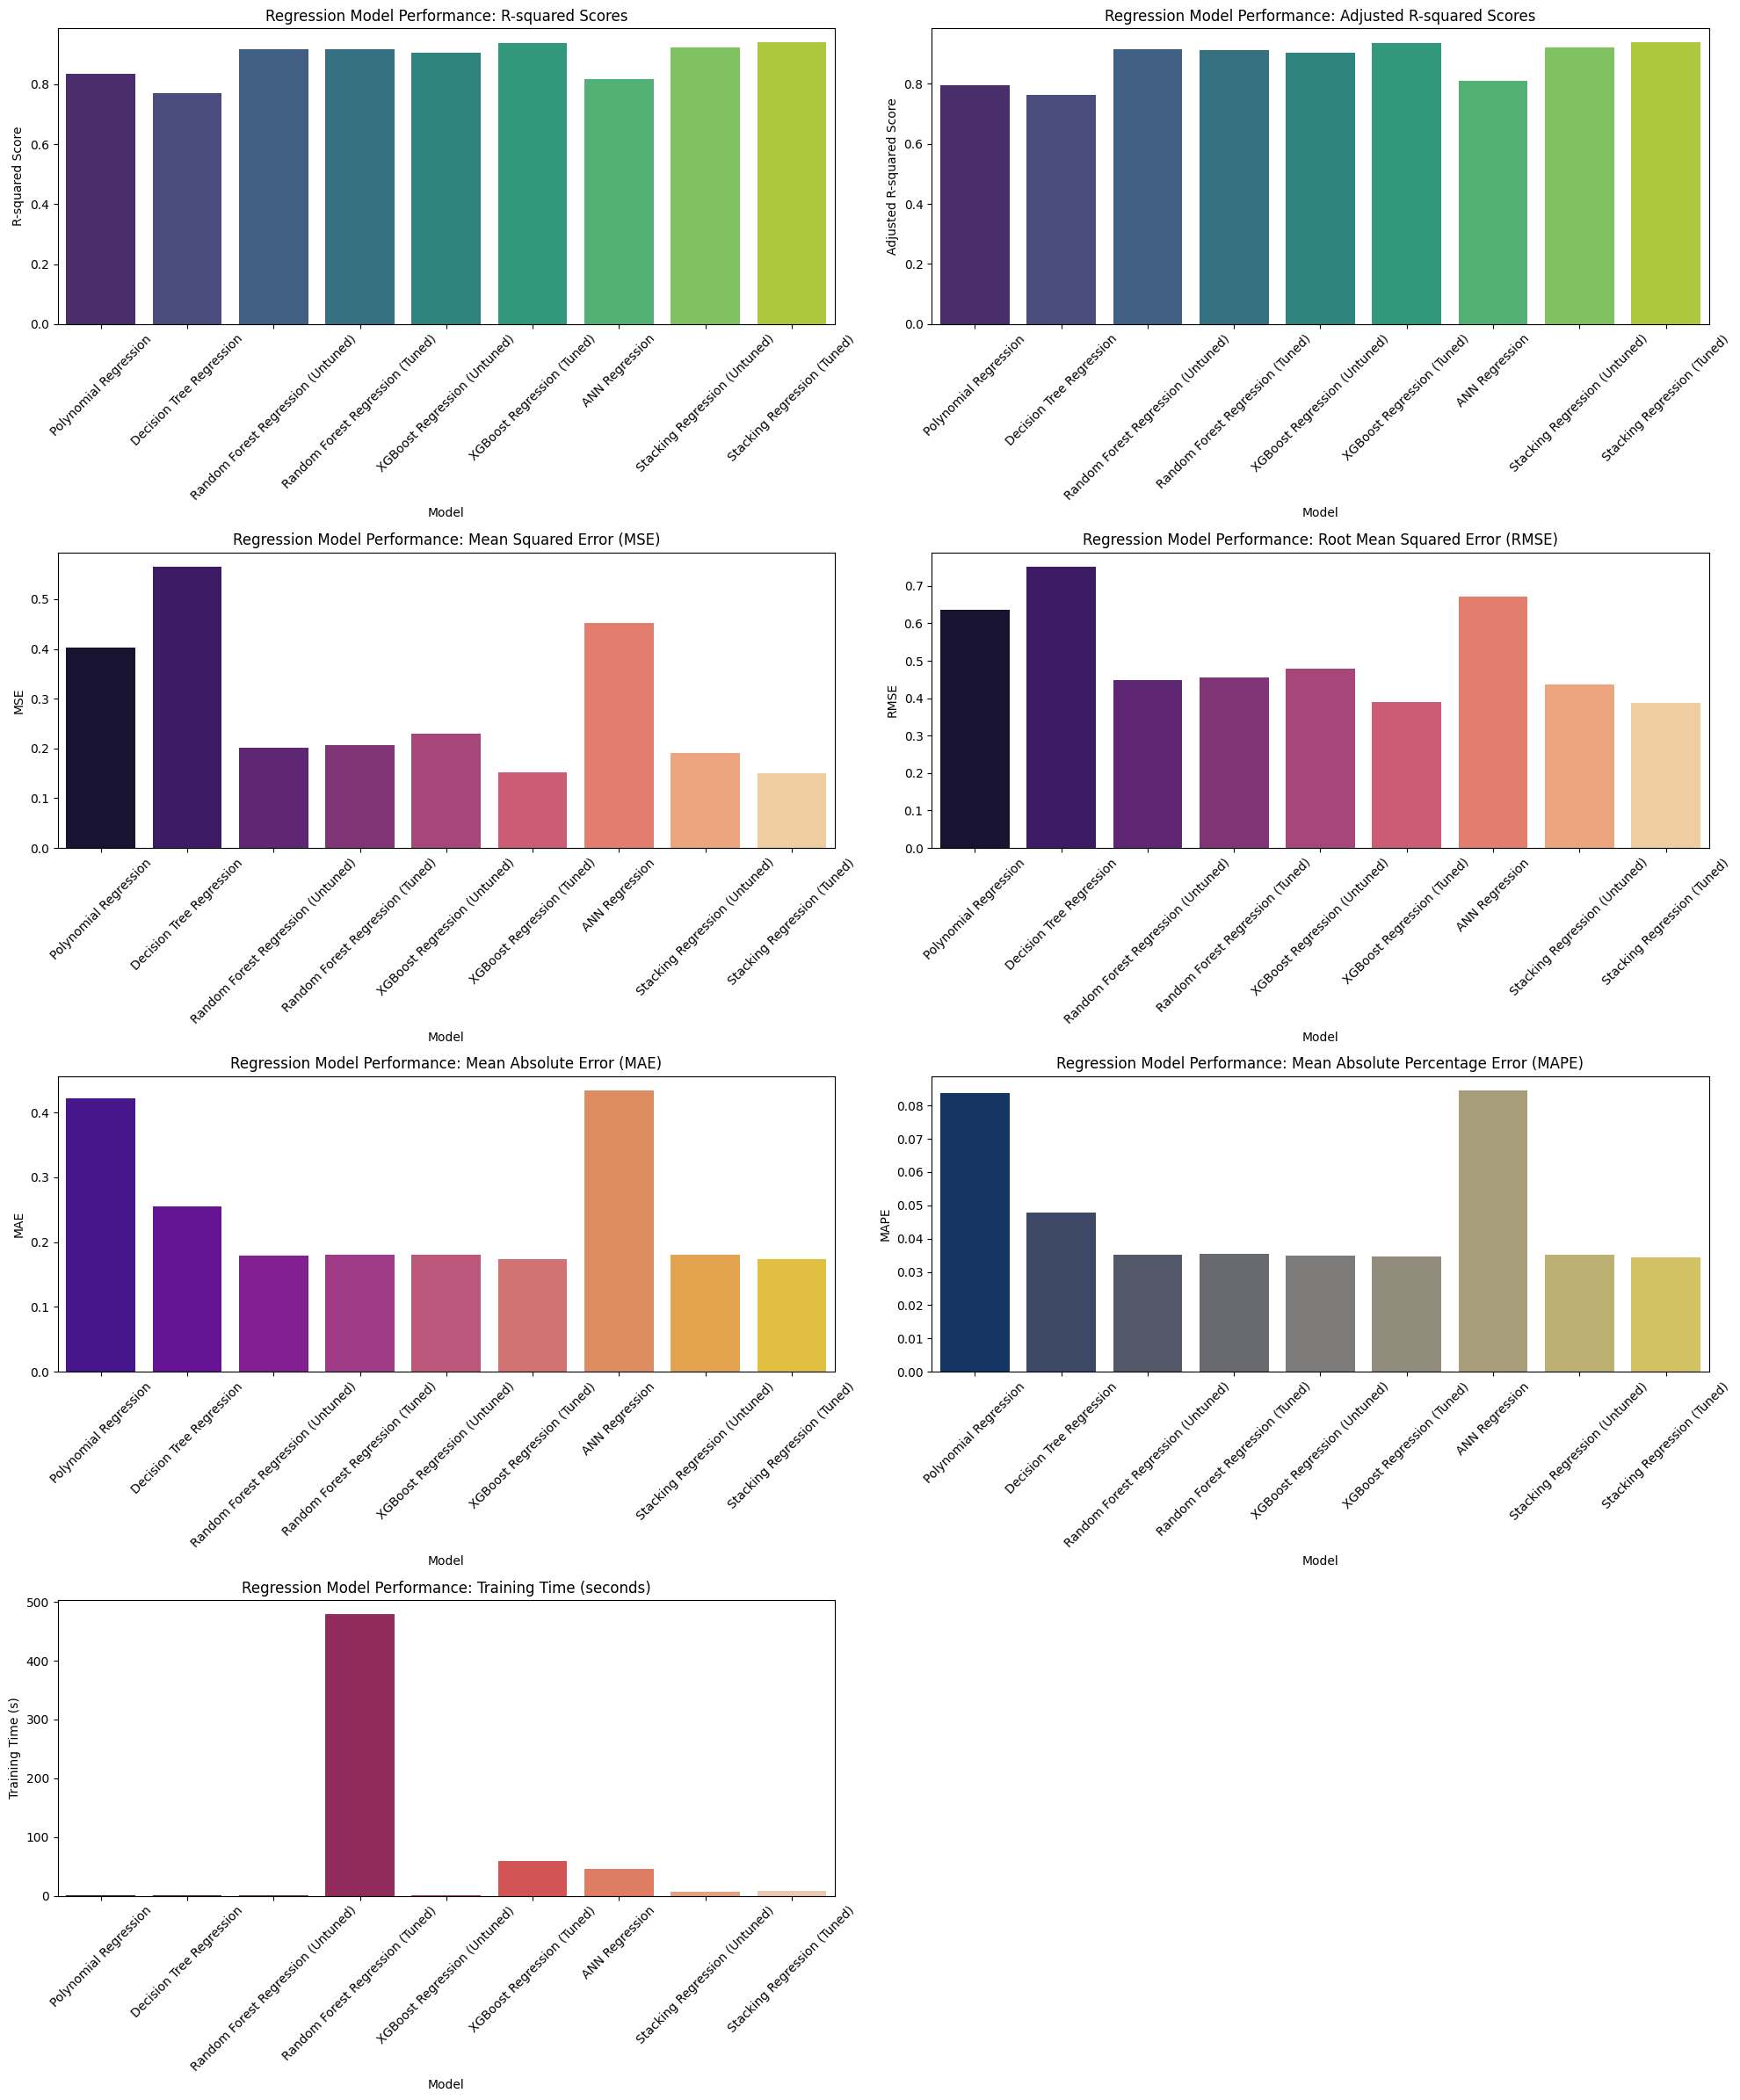

In [ ]:
# 4. Create a figure with subplots for R-squared, Adjusted R-squared, MSE, RMSE, MAE, MAPE and Training Time
fig, axes = plt.subplots(4, 2, figsize=(20, 24)) # Changed to 4 rows, 2 columns for 7 metrics
axes = axes.flatten()

# Plot R-squared scores
sns.barplot(x='Model', y='R-squared', data=model_performance, palette='viridis', hue='Model', legend=False, ax=axes[0])
axes[0].set_title('Regression Model Performance: R-squared Scores')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R-squared Score')
axes[0].tick_params(axis='x', rotation=45)

# Plot Adjusted R-squared scores
sns.barplot(x='Model', y='Adjusted R-squared', data=model_performance, palette='viridis', hue='Model', legend=False, ax=axes[1])
axes[1].set_title('Regression Model Performance: Adjusted R-squared Scores')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Adjusted R-squared Score')
axes[1].tick_params(axis='x', rotation=45)

# Plot MSE scores
sns.barplot(x='Model', y='MSE', data=model_performance, palette='magma', hue='Model', legend=False, ax=axes[2])
axes[2].set_title('Regression Model Performance: Mean Squared Error (MSE)')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('MSE')
axes[2].tick_params(axis='x', rotation=45)

# Plot RMSE scores
sns.barplot(x='Model', y='RMSE', data=model_performance, palette='magma', hue='Model', legend=False, ax=axes[3])
axes[3].set_title('Regression Model Performance: Root Mean Squared Error (RMSE)')
axes[3].set_xlabel('Model')
axes[3].set_ylabel('RMSE')
axes[3].tick_params(axis='x', rotation=45)

# Plot MAE scores
sns.barplot(x='Model', y='MAE', data=model_performance, palette='plasma', hue='Model', legend=False, ax=axes[4])
axes[4].set_title('Regression Model Performance: Mean Absolute Error (MAE)')
axes[4].set_xlabel('Model')
axes[4].set_ylabel('MAE')
axes[4].tick_params(axis='x', rotation=45)

# Plot MAPE scores
sns.barplot(x='Model', y='MAPE', data=model_performance, palette='cividis', hue='Model', legend=False, ax=axes[5])
axes[5].set_title('Regression Model Performance: Mean Absolute Percentage Error (MAPE)')
axes[5].set_xlabel('Model')
axes[5].set_ylabel('MAPE')
axes[5].tick_params(axis='x', rotation=45)

# Plot Training Time scores
sns.barplot(x='Model', y='Training Time (s)', data=model_performance, palette='rocket', hue='Model', legend=False, ax=axes[6])
axes[6].set_title('Regression Model Performance: Training Time (seconds)')
axes[6].set_xlabel('Model')
axes[6].set_ylabel('Training Time (s)')
axes[6].tick_params(axis='x', rotation=45)

# Hide the last subplot if it's empty (in case of odd number of metrics)
if len(model_performance.columns) - 1 < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()